# Projet:  
- Réalisation d'une ApplicationDasboard avec Streamlit  
à partir de base de données open source sur les transactions 
de cartes de crédits.
- Lien web vers la source des données:  
[credits_cards_transactions](https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset)
- Objectif de notre dasboard:  
Construire un dashboard qui des indicateurs  

## Importation des librairies

- Installation des librairies:  
Exécuter dans la cellule:  %pip install -r requirements.txt  
ou  
Exécuter dans le terminal (prompt ou powershell):  pip install -r requirements.txt

- Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
random.seed(123)

## Chargement des données

In [2]:
# Fonction pour charger les données

def load(file:str, size:int = 10**5, sep:str = ','):
    """--Docstring--
    fonction pour charger les données csv
    tout en optimisant la mémoire du système
    avec les fichiers volumineux. L'option
    size permet de charger les données par
    partition.
    Args:
        file: (string, file.csv or path )
        size: taille de la partition (integer, default = 100000)
              si la mémoire est insuffisante pour importer en un
              bloc.
        sep: séparateur (string, default = <,>)
    """

    try:

        data = pd.read_csv(file, sep=sep, index_col=0)
    
    except MemoryError:

        data = pd.read_csv(file, sep=sep, index_col=0,
                            chunksize = size)
    
    data.index.name = 'index'
    
    return data


In [3]:
# Chargement des données
path = r"C:\Users\Ilies\Desktop\Data\SDA (N.MOUMMOU)\Projet\credit_card_transactions.csv"
financial_data = load(path) 

## Exploration des données

### affichage des données

In [4]:
financial_data.head(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
index,,,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


### Description sur les types de variables

In [5]:
# Fonction pour décrire le dataframe
    
dictionnaire = {
    'trans_date_trans_time': 'Horodatage format date de la transaction',
    'cc_num': 'Numéro de carte de crédit',
    'merchant': 'Nom du commerce',
    'category' : 'Catégorie de la transaction, exemple: achat épicerie',
    'amt' : 'Montant de la transaction',
    'first': 'Prénom du titulaire de la carte',
    'last': 'Nom de famille du titulaire de la carte',
    'gender' : 'Sexe du titulaire de la carte',
    'street' : 'Rue du titulaire de la carte', 
    'city' :  'Ville du titulaire de la carte', 
    'state' : 'Etat du titulaire de la carte',
    'zip' : 'Code postal du titulaire de la carte', 
    'lat' : "Latitude du lieu d'achat de la transaction",
    'long' : "Longitude du lieu d'achat de la transaction",  
    'city_pop' : 'Population de la ville où la transaction a eu lieu',
    'job' : 'Profession du titulaire de la carte',
    'dob' : 'Date de naissance du titulaire de la carte',
    'trans_num' : 'Numéro de transaction unique',
    'unix_time' : 'Horodatage format Unix de la transaction',
    'merch_lat' : 'Latitude de la position du commerçant',  
    'merch_long': "Longitude de la position du commerçant", 
    'is_fraud' : 'Indicateur indiquant si la transaction est frauduleuse',
    'merch_zipcode' : 'Code postal du commerçant'
    }

def info(data):

    Information = pd.DataFrame({
        'Variables': data.columns,
        'Type': data.dtypes,
        'Unique_values': data.nunique(),
        'NA_counts': data.isna().sum(),
        'NA_percent%':data.isna().mean().round(4)*100,
        }).reset_index(drop=True)

    Information['Description_des_variables'] = Information['Variables'].map(dictionnaire)
    
    return Information

# Application sur financial_data

metadonnees = info(financial_data)
metadonnees

,Variables,Type,Unique_values,NA_counts,NA_percent%,Description_des_variables
0,trans_date_trans_time,object,1274791,0,0.00,Horodatage format date de la transaction
1,cc_num,int64,983,0,0.00,Numéro de carte de crédit
2,merchant,object,693,0,0.00,Nom du commerce
3,category,object,14,0,0.00,"Catégorie de la transaction, exemple: achat ép..."
4,amt,float64,52928,0,0.00,Montant de la transaction
5,first,object,352,0,0.00,Prénom du titulaire de la carte
6,last,object,481,0,0.00,Nom de famille du titulaire de la carte
7,gender,object,2,0,0.00,Sexe du titulaire de la carte
8,street,object,983,0,0.00,Rue du titulaire de la carte
9,city,object,894,0,0.00,Ville du titulaire de la carte


### mise en forme du type des variables

In [6]:
# fonction pour mettre en forme

def conversion(var):

    # conversion des variables de type = <date>
    date_vars = ('trans_date_trans_time', 'dob')

    if var.name in date_vars:
        
        return pd.to_datetime(var, infer_datetime_format = True)


    # conversion des variables type = <objet>
    if (var.dtype=='object') and (var.name not in date_vars):

        # conversion en string
        if var.nunique() > 20:
            return var.astype('string')

        # conversion en catégorie 
        else:
            return var.astype('category')
    
    else:
        return var 


In [7]:
# application de la fonction sur les variables 
financial_data = financial_data.apply(conversion, axis = 0)

### Création de nouvelles variables

- Variables dates

In [8]:
# mettre la variable trans_date_... au format '2020-01-31'
# avec une nouvelle variable

financial_data['date'] = pd.to_datetime(financial_data['trans_date_trans_time']
                                                                  .dt.strftime('%d-%b-%Y'))

financial_data['fulldate'] = financial_data['trans_date_trans_time']

# Extraire les périodes sur les transactions : jour, semaine de l'année, mois, heure

financial_data['year'] = (financial_data['trans_date_trans_time']
                                                   .dt.year)

financial_data['day'] = (financial_data['trans_date_trans_time']
                                                   .dt.day_name())

financial_data['hour'] = (financial_data['trans_date_trans_time']
                                                   .dt.hour)
                                                   
financial_data['month'] = (financial_data['trans_date_trans_time']
                                                   .dt.month_name())

financial_data['year_month'] = (financial_data['trans_date_trans_time']
                                                   .dt.to_period('M'))


# financial_data['hour'] = (financial_data['trans_date_trans_time']
#                                                    .dt.strftime('%H.%M')).astype(float)

# Créer une variable moment de la journée à partir de heure_transaction

#condlist = [financial_data['hour'].between(6,12.59),
            # financial_data['hour'].between(13,18.59),
            # financial_data['hour'].between(19,23.59),
            # financial_data['hour'].between(0,5.59)
            #]
# choicelist = ['Morning: 6h-12h59',
#               'Afternoon: 13h-18h59',
#               'Evening: 19h-23h59',
#               'Night: 00h-5h59'
#               ]

# financial_data['moment_transaction'] = np.select(condlist, choicelist, default=None)
# financial_data['moment_transaction'] = financial_data['moment_transaction'].astype('category')

- Variables Âge, Nom

In [9]:
# Définir la date de référence pour le calcul de l'âge
reference_date = pd.to_datetime('2020-12-31')

# Calcul de l'âge de l'individu à partir de la date de naissance (dob) 
financial_data['age'] = ((reference_date - financial_data['dob']).dt.days/365).astype('int')

# Création de la variable groupe d'âge
financial_data['group_age']=pd.cut(financial_data['age'],
                                   bins=[14,21,31,41,51,61,100],
                                   labels=['15-20 ans', '21-30 ans','31-40 ans','41-50 ans','51-60 ans' ,'60 ans et plus']
                                  ).astype('category')
# Concaténer first(prénom) et last(nom_de_famille) pour avoir
# nom complet



financial_data['fullname'] = (financial_data['first'] +' '+ financial_data['last']).astype('string')

- Création de la variable Emmeteur de la carte de crédits

In [10]:

#On converti le numéro de carte bancaire en string
financial_data['cc_num'] = financial_data['cc_num'].astype(str)

# Charger le JSON
with open(r"C:\Users\Ilies\Desktop\Data\SDA (N.MOUMMOU)\Projet\iin_ranges.json", "r") as file:
    iin_data = json.load(file)

# Création d'une fonction pour déterminer l'emmeteur des cartes
# en fonction des six premiers chiffres de la carte de crédit

def get_issuer(card_number):
    for network, ranges in iin_data["networks"].items():
        for iin_range in ranges:
            if "-" in iin_range:
                start, end = map(int, iin_range.split("-"))
                if start <= int(card_number[:len(str(start))]) <= end:
                    return network
            else:
                if card_number.startswith(iin_range):
                    return network
    return "Unknown Issuer Network"

# création de la variable issuer identification number = 'iin'

financial_data['iin'] = (financial_data['cc_num'].str[:6]
                                                 .apply(get_issuer))

# Regrouper les emmeteurs par grands groupes
def map_iin_group(iin):
    if iin in ['Discover Card', 'Diners Club Intl', 'Diners Club USA & Canada']:
        return 'Discover Financial Services'
    elif iin in ['Mastercard', 'Maestro', 'Maestro UK', 'Switch']:
        return 'Mastercard Group'
    else:
        return iin

# Appliquer la fonction à une nouvelle colonne
financial_data['iin_group'] = financial_data['iin'].apply(map_iin_group)

- Création des variables nombre de transaction, de fraudes,  
montants des transactions, montants des fraudes et taux de fraudes

In [11]:
# liste des variables pour les aggrégations
agglist = ['fullname','date']

# Calcul du nombre de transactions journalières
#par personne
financial_data['daily_transactions'] = financial_data.groupby(agglist)['amt'].transform('size')

# Calcul du montant journalier des transactions
# par personne
financial_data['daily_amount$'] = financial_data.groupby(agglist)['amt'].transform('sum')

# Calcul du nombre de fraude journalier sur les transactions 
# par personne
financial_data['daily_number_fraud'] = financial_data.groupby(agglist)['is_fraud'].transform('sum')

# Calcul du cout = montant journalier des fraudes sur transactions 
# par personne
financial_data['daily_fraud_amount$'] = (financial_data[financial_data['is_fraud']==1]
                                                            .groupby(agglist)['amt']
                                                            .transform('sum')
                                      )
financial_data['daily_fraud_amount$'].fillna(0, inplace = True)

# calcul du taux de fraude journalier par personne

financial_data['daily_fraud_rate'] = ((financial_data['daily_number_fraud']/
                                       financial_data['daily_transactions'])
                                       .round(4)*100
                                      )


# liste = ['fulldate', 'date', 'year', 'month', 'day', 'hour', 'year_month' , 'fullname','age','group_age','gender','job',
#          'daily_transactions','amt','daily_amount$','daily_number_fraud','daily_fraud_amount$',
#          'daily_fraud_rate','category','cc_num', 'iin', 'iin_group','is_fraud','city','city_pop','long','lat','state']

liste = ['fulldate','date', 'hour', 'day', 'fullname','gender','group_age', 'state', 'city', 'city_pop', 'amt', 'category', 'is_fraud','cc_num','iin','daily_amount$','daily_number_fraud']
# Affichage des données
financial_data[liste].head(20)

,fulldate,date,hour,day,fullname,gender,group_age,state,city,city_pop,amt,category,is_fraud,cc_num,iin,daily_amount$,daily_number_fraud
index,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2019-01-01,0,Tuesday,Jennifer Banks,F,31-45 ans,NC,Moravian Falls,3495,4.97,misc_net,0,2703186189652095,Mastercard,136.31,0
1,2019-01-01 00:00:44,2019-01-01,0,Tuesday,Stephanie Gill,F,31-45 ans,WA,Orient,149,107.23,grocery_pos,0,630423337322,Laser,735.80,0
2,2019-01-01 00:00:51,2019-01-01,0,Tuesday,Edward Sanchez,M,46-60 ans,ID,Malad City,4154,220.11,entertainment,0,38859492057661,Diners Club Intl,220.11,0
3,2019-01-01 00:01:16,2019-01-01,0,Tuesday,Jeremy White,M,46-60 ans,MT,Boulder,1939,45.00,gas_transport,0,3534093764340240,JCB,54.46,0
4,2019-01-01 00:03:06,2019-01-01,0,Tuesday,Tyler Garcia,M,31-45 ans,VA,Doe Hill,99,41.96,misc_pos,0,375534208663984,American Express,326.28,0
5,2019-01-01 00:04:08,2019-01-01,0,Tuesday,Jennifer Conner,F,46-60 ans,PA,Dublin,2158,94.63,gas_transport,0,4767265376804500,Visa,94.63,0
6,2019-01-01 00:04:42,2019-01-01,0,Tuesday,Kelsey Richards,F,15-30 ans,KS,Holcomb,2691,44.54,grocery_net,0,30074693890476,Diners Club Intl,1615.07,0
7,2019-01-01 00:05:08,2019-01-01,0,Tuesday,Steven Williams,M,60 ans et plus,VA,Edinburg,6018,71.65,gas_transport,0,6011360759745864,Discover Card,129.47,0
8,2019-01-01 00:05:18,2019-01-01,0,Tuesday,Heather Chase,F,60 ans et plus,PA,Manor,1472,4.27,misc_pos,0,4922710831011201,Visa,9.61,0


### Extraction des données

In [12]:
# extraction des données néttoyées
financial_data[liste].to_csv('financial_clean.csv', chunksize = 10**5)

# Sous base de données individus
# l'unité d'observation est la transaction journalière d'une personne
individual_data = (financial_data[liste].drop(['group_age','city_pop','amt'], axis = 1)
                                        .drop_duplicates(subset = agglist)
                                        .sort_values(by = agglist,ignore_index = True)    
                   )
individual_data.to_csv('individual_data.csv')

# extraction des métadonnées
metadonnees.to_csv('metadonnees.csv')

In [13]:
individual_data.head(20)

,fulldate,date,hour,day,fullname,gender,state,city,category,is_fraud,cc_num,iin,daily_amount$,daily_number_fraud
0,2019-01-01 01:02:16,2019-01-01,1,Tuesday,Aaron Murray,M,MO,Meadville,grocery_pos,0,376028110684021,American Express,889.67,0
1,2019-01-02 21:25:21,2019-01-02,21,Wednesday,Aaron Murray,M,MO,Meadville,kids_pets,0,376028110684021,American Express,52.93,0
2,2019-01-03 02:18:11,2019-01-03,2,Thursday,Aaron Murray,M,MO,Meadville,gas_transport,0,376028110684021,American Express,190.53,0
3,2019-01-05 10:45:24,2019-01-05,10,Saturday,Aaron Murray,M,MO,Meadville,grocery_net,0,376028110684021,American Express,177.15,0
4,2019-01-06 05:01:12,2019-01-06,5,Sunday,Aaron Murray,M,MO,Meadville,shopping_pos,0,376028110684021,American Express,271.06,0
5,2019-01-07 02:12:15,2019-01-07,2,Monday,Aaron Murray,M,MO,Meadville,shopping_pos,0,376028110684021,American Express,397.03,0
6,2019-01-08 00:32:56,2019-01-08,0,Tuesday,Aaron Murray,M,MO,Meadville,gas_transport,0,376028110684021,American Express,379.61,0
7,2019-01-09 05:37:59,2019-01-09,5,Wednesday,Aaron Murray,M,MO,Meadville,gas_transport,0,376028110684021,American Express,118.48,0
8,2019-01-10 12:27:25,2019-01-10,12,Thursday,Aaron Murray,M,MO,Meadville,home,0,376028110684021,American Express,294.43,0
9,2019-01-11 09:21:54,2019-01-11,9,Friday,Aaron Murray,M,MO,Meadville,grocery_pos,0,376028110684021,American Express,272.08,0


- fonction pour tableau Croisé de Statistiques descriptives

In [14]:
def cross_stat(data:pd.DataFrame, catlist:list, statvars:list):

    """--Docstring--
    fonction pour réaliser des statistiques
    sur des variables croisées.
    
    Args:
         data: le dataframe
         catlist: (list) variables catégorielles
         statvars: (list) variables continues
    
    return a dataframe
    """
    # initialisation d'un tableau vide
    table = pd.DataFrame()
    
    # Création de dictionnaire pour les indexes
    index_mapping = {value: cat for cat in catlist for value in data[cat].unique()}

    
    for var in statvars:

        for cat in catlist:
            
            X = data.groupby(by=cat)[var].agg(min = 'min',
                                              max = 'max',
                                              mean = 'mean',
                                              st_deviation = 'std',
                                              quartile1 = lambda x: x.quantile(0.25),
                                              median = 'median',
                                              quartile3 = lambda x: x.quantile(0.75),
                                              category_size = 'count')

            table = pd.concat([table,X], axis = 0, ignore_index = False)
    
        table.reset_index(names = 'valeurs', inplace = True)
        table['Categories'] = table['valeurs'].map(index_mapping)
        table.set_index(['Categories','valeurs'], inplace = True)
    
        print(f'Tableau Statistiques croisées sur: {var}')
        display(table.round(2))
        print('\n\n')


Total des paiements par liste d'émetteur
iin
Visa                        418816
JCB                         288558
Diners Club Intl            125985
American Express            123834
Discover Card               105436
Mastercard                   88287
Maestro                      47362
UATP                         39893
GPN                          21524
Laser                        17883
Diners Club USA & Canada      8278
InstaPayment                  5641
Maestro UK                    5169
Switch                           9
Name: count, dtype: int64


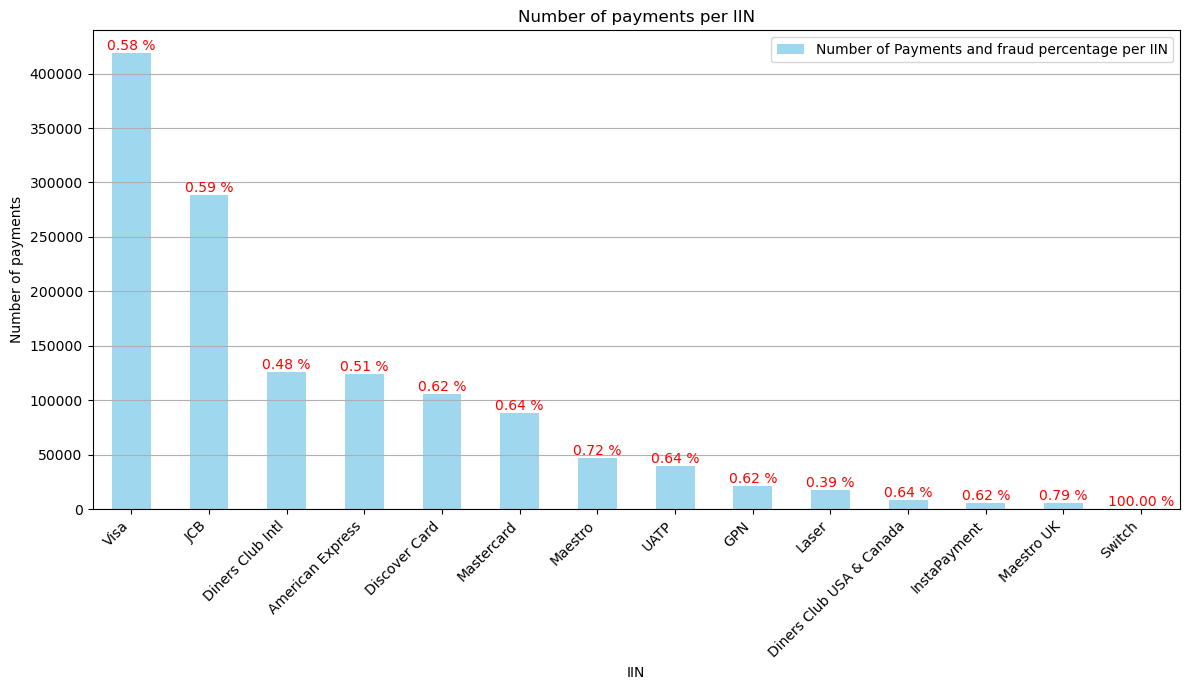

In [15]:
print("Total des paiements par liste d'émetteur")
print(financial_data['iin'].value_counts())



# Nombre de paiement en fonction de la liste d'emmeteur

# Grouper par mois, et compter les occurrences
iin_sum = financial_data.groupby('iin').size().sort_values(ascending=False)
# category_sum_by_month = df.groupby(['year_month', 'category']).size().unstack(fill_value=0)

# Calculer les paiements frauduleux par liste d'émetteur
fraud_iin_sum = financial_data[financial_data['is_fraud'] == 1].groupby('iin').size()
fraud_iin_percentage = (fraud_iin_sum / iin_sum) * 100

# Calculer le paiement moyen par catégorie
avg_payment_per_iin = financial_data.groupby('iin')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_category,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé des paiements par catégorie
iin_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)


# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, iin in enumerate(iin_sum.index):
    ax1.text(i, iin_sum[iin], f'{fraud_iin_percentage[iin]:.2f} %', 
             ha='center', va='bottom', color='red', fontsize=10)
    
# Configuration du graphique
plt.xlabel('IIN')
plt.ylabel('Number of payments')
plt.title('Number of payments per IIN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and fraud percentage per IIN'], loc='upper right')


plt.tight_layout()
plt.show()



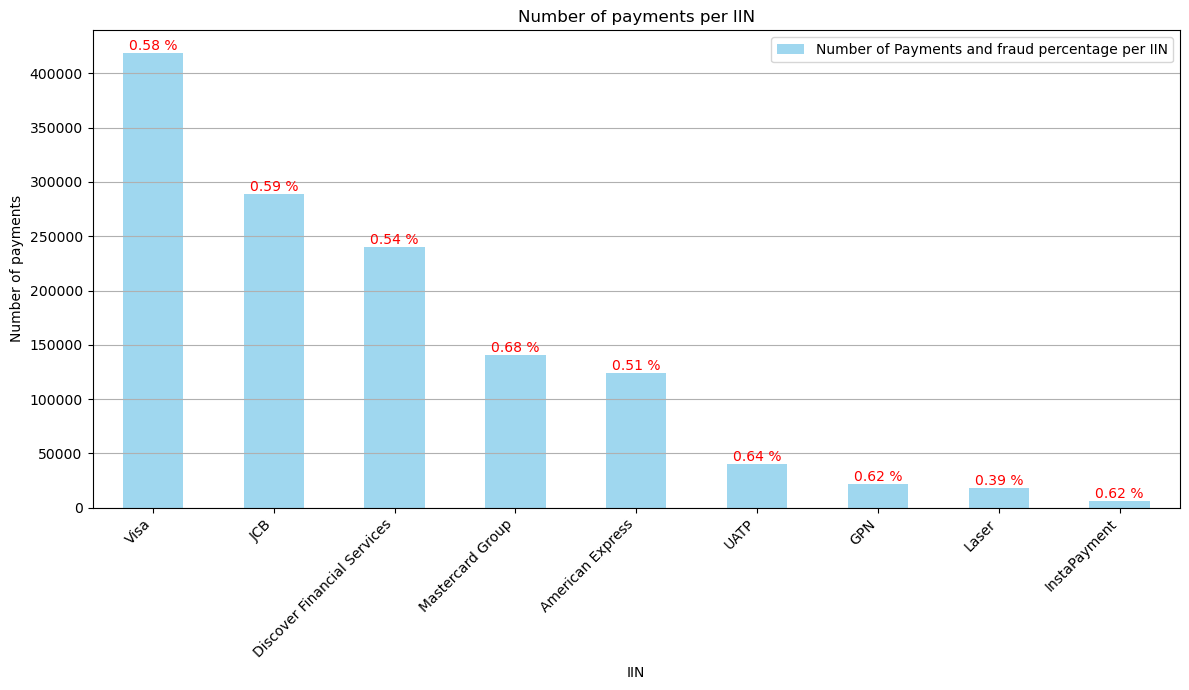

In [17]:
# Appliquer la fonction à une nouvelle colonne
financial_data['iin_group'] = financial_data['iin'].apply(map_iin_group)

iin_sum = financial_data.groupby('iin_group').size().sort_values(ascending=False)

# Calculer les paiements frauduleux par liste d'émetteur
fraud_iin_sum = financial_data[financial_data['is_fraud'] == 1].groupby('iin_group').size()
fraud_iin_percentage = (fraud_iin_sum / iin_sum) * 100

# Calculer le paiement moyen par catégorie
avg_payment_per_iin = financial_data.groupby('iin_group')['amt'].mean()

# Afficher le résultat
# print("Nombre de paiements en fonction des categories :\n\n", category_sum,"\n")
# print("Montant de paiements moyens en fonction des categories :\n\n", avg_payment_per_category,"\n")


# Tracer un histogramme pour le nombre de paiements par catégorie
fig, ax1 = plt.subplots(figsize=(12, 7))

# Tracé des paiements par catégorie
iin_sum.plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8)


# Ajouter les paiements moyens en tant qu'annotations sur les barres
for i, iin_group in enumerate(iin_sum.index):
    ax1.text(i, iin_sum[iin_group], f'{fraud_iin_percentage[iin_group]:.2f} %', 
             ha='center', va='bottom', color='red', fontsize=10)
    
# Configuration du graphique
plt.xlabel('IIN')
plt.ylabel('Number of payments')
plt.title('Number of payments per IIN')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

ax1.legend(['Number of Payments and fraud percentage per IIN'], loc='upper right')


plt.tight_layout()
plt.show()